<a href="https://colab.research.google.com/github/AbdelDev07/TensorFlowATL/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import requests
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sys
import datetime
from tensorflow import keras
from tensorflow.keras.models import Model
import tensorflow as tf
import pathlib
import os
import zipfile
from tensorflow.keras import layers, callbacks

In [2]:
#Téléchargement du dataset
data_dir = tf.keras.utils.get_file(
    "dataset210.zip",
    "https://github.com/AbdelDev07/testdata/raw/main/dataset2.zip",
    extract=False)

9013381/9013381 [==============================] - 0s 0us/step


In [3]:
#Décompression du dataset
with zipfile.ZipFile(data_dir, 'r') as zip_ref:
    zip_ref.extractall('/content/datasets')

data_dir = pathlib.Path('/content/datasets/dataset2')

In [4]:
# Definition de la taille des images
batch_size = 3
img_height = 200
img_width = 200

# Entreinnement du modèle
train_data = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  )

# Phase de validation du modèle
val_data = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = val_data.class_names
print(class_names)

Found 400 files belonging to 2 classes.
Using 320 files for training.
Found 400 files belonging to 2 classes.
Using 80 files for validation.
['cats', 'dogs']


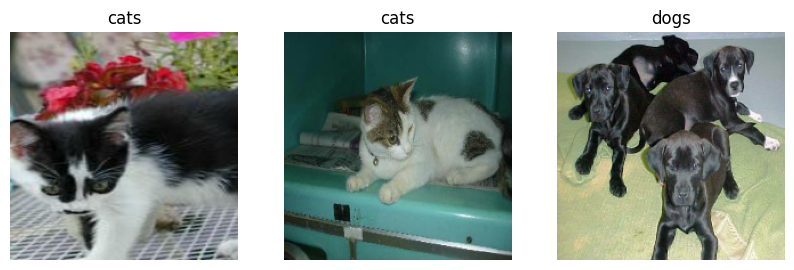

In [5]:
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
  for i in range(3):
    ax = plt.subplot(1, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [9]:
import tensorflow as tf
from tensorflow.keras import layers, callbacks
from tensorflow.keras.optimizers import Adam

# Definition de la taille des images
batch_size = 32  # Augmentation de la taille du batch pour une meilleure généralisation
img_height = 224  # Réduction de la taille des images pour accélérer l'entraînement
img_width = 224

# Entreinnement du modèle
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size,
)

# Phase de validation du modèle
val_data = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

class_names = val_data.class_names
print(class_names)

# Nombre de classes dans la classification
num_classes = 2

# Définition du modèle séquentiel
model = tf.keras.Sequential([
    # Utilisation d'un modèle pré-entraîné (MobileNetV2) avec fine-tuning
    tf.keras.applications.MobileNetV2(input_shape=(img_height, img_width, 3),
                                      include_top=False,
                                      weights='imagenet'),

    # Global Average Pooling pour réduire le nombre de paramètres
    layers.GlobalAveragePooling2D(),

    # Couches denses pour la classification finale
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Dropout pour réduire le surajustement
    layers.Dense(num_classes, activation='softmax')
])

# Congélation des couches du modèle pré-entraîné
model.layers[0].trainable = False

# Compilation du modèle avec l'optimiseur Adam, la perte entropie croisée catégorique sparse et la métrique d'exactitude
model.compile(optimizer=Adam(learning_rate=0.0001),  # Utilisation d'un taux d'apprentissage plus petit
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

# Callback TensorBoard pour la visualisation pendant l'entraînement
logdir = "logs"
tensorboard_callback = callbacks.TensorBoard(log_dir=logdir, histogram_freq=1, write_images=logdir)

# Entraînement du modèle avec les données d'entraînement et de validation
model.fit(
    train_data,
    validation_data=val_data,
    epochs=10,  # Augmentation du nombre d'époques pour un meilleur entraînement
    callbacks=[tensorboard_callback]
)


Found 400 files belonging to 2 classes.
Using 320 files for training.
Found 400 files belonging to 2 classes.
Using 80 files for validation.
['cats', 'dogs']
9406464/9406464 [==============================] - 0s 0us/step
Epoch 1/10
10/10 [==============================] - 27s 2s/step - loss: 0.9240 - accuracy: 0.4906 - val_loss: 0.7437 - val_accuracy: 0.4625
Epoch 2/10
10/10 [==============================] - 21s 2s/step - loss: 0.8375 - accuracy: 0.5344 - val_loss: 0.7272 - val_accuracy: 0.5000
Epoch 3/10
10/10 [==============================] - 22s 2s/step - loss: 0.7778 - accuracy: 0.5531 - val_loss: 0.7134 - val_accuracy: 0.6000
Epoch 4/10
10/10 [==============================] - 22s 2s/step - loss: 0.7422 - accuracy: 0.5562 - val_loss: 0.7064 - val_accuracy: 0.6000
Epoch 5/10
10/10 [==============================] - 19s 2s/step - loss: 0.7271 - accuracy: 0.5531 - val_loss: 0.7049 - val_accuracy: 0.5875
Epoch 6/10
10/10 [==============================] - 21s 2s/step - loss: 0.6721 

In [10]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense_4 (Dense)             (None, 128)               163968    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 2)                 258       
                                                                 
Total params: 2422210 (9.24 MB)
Trainable params: 1642

In [13]:
# URL de l'image à télécharger
img_url = "https://github.com/AbdelDev07/TensorFlowATL/blob/master/animal%20dog%20bulldog/BWLP1ZGMRQFX.jpg?raw=true"
image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/2/25/Chat_roux_%C3%A0_pelage_court..jpg/300px-Chat_roux_%C3%A0_pelage_court..jpg"

# Téléchargement de l'image depuis l'URL
response = requests.get(image_url)
img_array = np.array(bytearray(response.content), dtype=np.uint8)
image_to_predict = cv2.imdecode(img_array, cv2.IMREAD_COLOR)

# Redimensionner l'image pour l'ajuster à la taille définie par le modèle
img_to_predict = cv2.resize(image_to_predict, (224, 224))
img_to_predict = np.expand_dims(img_to_predict, axis=0)  # Ajout de la dimension batch

# Prédiction avec le modèle et obtention de la classe prédite
predictions = model.predict(img_to_predict)
res = np.argmax(predictions)

# Affichage de la classe prédite et des probabilités pour chaque classe
print("Classe prédite :", res)
print("Probabilités :", predictions)

print(f"C'EST UN {class_names[res]} !")


1/1 [==============================] - 0s 63ms/step
Classe prédite : 0
Probabilités : [[0.5849369  0.41506317]]
C'EST UN cats !
